# KNN no `chb06_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb06_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.682927,0.829268,0.756098,0.707317,0.731707,0.756098,0.707317,0.658537,0.853659,0.853659,0.804878,0.658537,0.829268,0.780488,0.804878,0.609756,0.682927,0.926829
1,0.609756,0.780488,0.707317,0.634146,0.731707,0.780488,0.682927,0.585366,0.829268,0.756098,0.804878,0.658537,0.756098,0.756098,0.560976,0.609756,0.682927,0.780488
2,0.658537,0.926829,0.682927,0.658537,0.707317,0.707317,0.853659,0.658537,0.878049,0.756098,0.853659,0.731707,0.804878,0.780488,0.658537,0.658537,0.634146,0.731707
3,0.731707,0.853659,0.756098,0.682927,0.707317,0.756098,0.829268,0.585366,0.902439,0.731707,0.878049,0.682927,0.756098,0.853659,0.560976,0.731707,0.658537,0.731707
4,0.707317,0.780488,0.682927,0.634146,0.585366,0.731707,0.658537,0.512195,0.878049,0.731707,0.585366,0.585366,0.756098,0.731707,0.536585,0.707317,0.634146,0.780488
5,0.634146,0.878049,0.634146,0.634146,0.707317,0.756098,0.756098,0.560976,0.853659,0.731707,0.707317,0.634146,0.804878,0.780488,0.658537,0.804878,0.560976,0.731707
6,0.682927,0.853659,0.731707,0.609756,0.682927,0.731707,0.682927,0.658537,0.829268,0.756098,0.707317,0.634146,0.804878,0.658537,0.634146,0.731707,0.609756,0.707317
7,0.707317,0.951220,0.682927,0.609756,0.609756,0.682927,0.658537,0.634146,0.804878,0.707317,0.731707,0.585366,0.682927,0.731707,0.609756,0.682927,0.536585,0.682927
8,0.609756,0.853659,0.780488,0.756098,0.707317,0.853659,0.731707,0.780488,0.951220,0.853659,0.756098,0.707317,0.829268,0.829268,0.780488,0.682927,0.731707,0.707317
9,0.731707,0.853659,0.804878,0.609756,0.658537,0.731707,0.756098,0.609756,0.780488,0.829268,0.658537,0.682927,0.829268,0.756098,0.634146,0.829268,0.609756,0.804878


,count,mean,std,min,25%,50%,75%,max
8,20.0,0.857317,0.047660,0.780488,0.829268,0.853659,0.884146,0.951220
1,20.0,0.846341,0.044130,0.780488,0.829268,0.853659,0.859756,0.951220
12,20.0,0.786585,0.048700,0.682927,0.756098,0.804878,0.829268,0.853659
10,20.0,0.758537,0.071175,0.585366,0.725610,0.756098,0.804878,0.878049
9,20.0,0.753659,0.054767,0.658537,0.725610,0.743902,0.768293,0.853659
13,20.0,0.751220,0.051039,0.658537,0.725610,0.756098,0.780488,0.853659
17,20.0,0.735366,0.069562,0.585366,0.707317,0.719512,0.780488,0.926829
2,20.0,0.718293,0.061027,0.560976,0.682927,0.731707,0.756098,0.804878
5,20.0,0.718293,0.058939,0.634146,0.658537,0.707317,0.756098,0.853659
6,20.0,0.715854,0.061436,0.585366,0.682927,0.707317,0.737805,0.853659


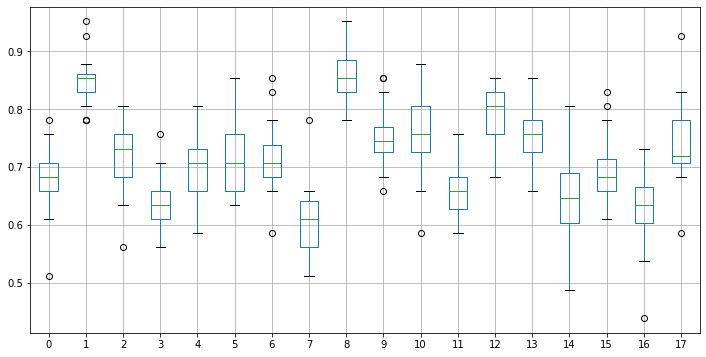

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '06'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.681707,0.058939,0.682927,06,0
1,0.846341,0.044130,0.853659,06,1
2,0.718293,0.061027,0.731707,06,2
3,0.640244,0.044677,0.634146,06,3
4,0.693902,0.056220,0.707317,06,4
5,0.718293,0.058939,0.707317,06,5
6,0.715854,0.061436,0.707317,06,6
7,0.604878,0.062610,0.609756,06,7
8,0.857317,0.047660,0.853659,06,8
9,0.753659,0.054767,0.743902,06,9
